In [3]:
import re
import matplotlib.pyplot as plt

def extract_metric_from_log(log_file, metric):
    metric_values = []
    with open(log_file, 'r') as file:
        for line in file:
            match = re.search(rf'{metric}: ([0-9.]+)', line)
            if match:
                metric_values.append(float(match.group(1)))
    return metric_values

def plot_metrics(log_dict, metric):
    for label, log_file in log_dict.items():
        metric_values = extract_metric_from_log(log_file, metric)
        plt.plot(metric_values, label=label)  # Use the directory name as the label

    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.ylim(0.7, 0.95)
    plt.title(f'{metric}')
    plt.legend()
    plt.show()

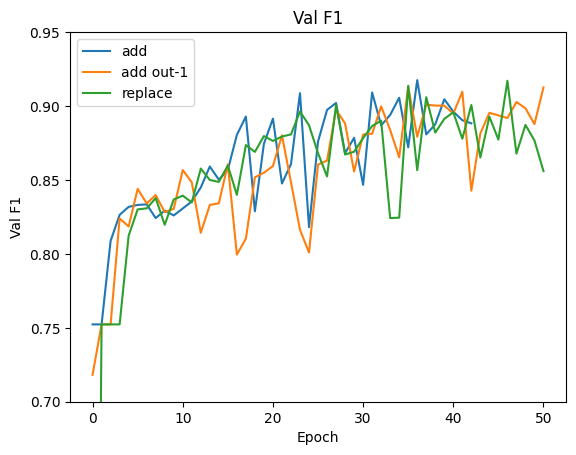

In [7]:
log_dict = {
    'add': '/home/zyq123/TONN/tonn_fusion/fusion/tt_runs/2817821/exp.log',
    'add out-1': '/home/zyq123/TONN/tonn_fusion/fusion/tt_runs/2821523/exp.log',
    'replace': '/home/zyq123/TONN/tonn_fusion/fusion/tt_runs/2836054/exp.log'
}

metric = 'Val F1'  # Metric to plot

plot_metrics(log_dict, metric)

# Journal Plot

In [1]:
import matplotlib.pyplot as plt
# Set font properties
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']

class NoiseResult:
    def __init__(self, name, x_axis, y_weight, y_phase, y_onchip):
        self.name = name
        self.weight_pretrain = 86.45
        self.phase_pretrain = 84.06
        self.x_axis = x_axis
        self.y_weight_mean = [row[0] for row in y_weight]
        self.y_weight_std = [row[1] for row in y_weight]
        self.y_phase_mean = [row[0] for row in y_phase]
        self.y_phase_std = [row[1] for row in y_phase]
        self.y_onchip_mean = [row[0] for row in y_onchip]
        self.y_onchip_std = [row[1] for row in y_onchip]

# Random_phase_bias = NoiseResult('Random phase bias', 
#                           [0, 1], 
#                           [86.45, 9.43], 
#                           [83.21, 84.06])

Gamma_noise = NoiseResult('Gamma noise', 
                          [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01], 
                          y_weight = [
                              [85.90, 0.330],
                              [85.64, 0.330],
                              [84.40, 0.631],
                              [82.93, 0.906],
                              [79.95, 2.751],
                              [72.28, 8.572],
                              [50.33, 28.959],
                              [27.99, 29.912],
                              [16.64, 12.482],
                              [10.16, 1.264],
                              [9.50, 0.127]
                          ], 
                          y_phase = [
                              [83.46, 0.922],
                              [83.85, 0.808],
                              [84.33, 0.542],
                              [83.38, 2.369],
                              [78.41, 1.145],
                              [71.18, 2.426],
                              [68.23, 2.571],
                              [66.88, 2.007],
                              [66.84, 2.546],
                              [66.98, 2.794],
                              [65.79, 0.727]
                          ],
                          y_onchip = [
                            [84.05, 0.92],
                            [84.45, 1.55],
                            [83.48, 0.95],
                            [83.05, 0.97],
                            [83.21, 0.72],
                            [83.64, 0.26],
                            [84.33, 0.91],
                            [83.91, 1.66],
                            [82.51, 2.10],
                            [83.90, 1.04],
                            [83.52, 0.42]
                        ]
                        )

Crosstalk = NoiseResult('Crosstalk', 
                          [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01], 
                          y_weight = [
                              [85.90, 0.330],
                              [85.45, 0.086],
                              [85.08, 0.537],
                              [84.59, 0.333],
                              [83.77, 0.418],
                              [83.21, 0.476],
                              [80.69, 0.763],
                              [76.16, 1.251],
                              [68.61, 1.038],
                              [58.66, 2.481],
                              [39.40, 4.657]
                          ], 
                          y_phase = [
                              [83.46, 0.922],
                              [83.39, 0.769],
                              [83.33, 0.951],
                              [83.06, 1.062],
                              [83.37, 0.767],
                              [83.51, 0.914],
                              [83.82, 0.921],
                              [84.30, 1.005],
                              [84.05, 0.415],
                              [82.97, 1.229],
                              [79.67, 1.286]
                          ],
                          y_onchip = [
                            [84.05, 0.92],
                            [82.51, 1.18],
                            [84.13, 1.06],
                            [83.73, 0.80],
                            [83.69, 2.25],
                            [83.44, 2.71],
                            [84.84, 0.61],
                            [84.17, 2.10],
                            [85.36, 0.82],
                            [85.84, 0.43],
                            [84.72, 0.66]
                        ]
                        )


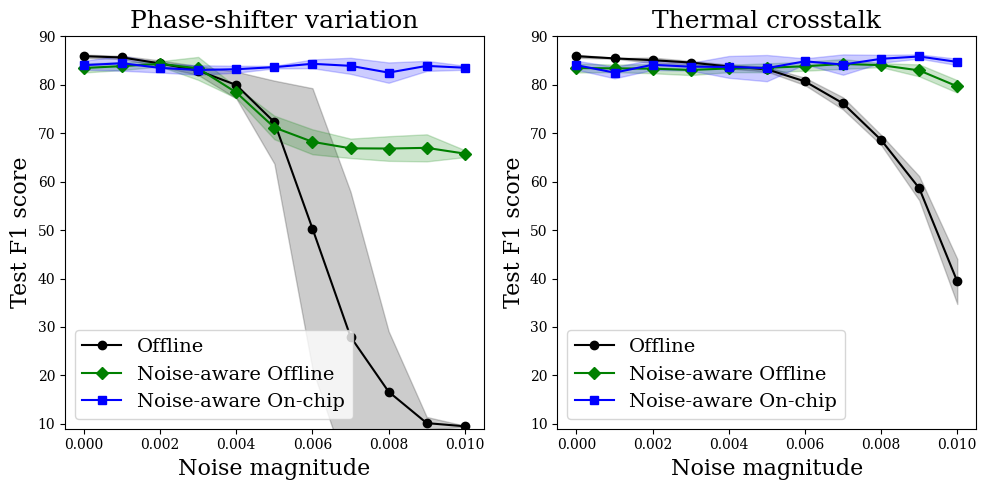

In [3]:

# Set font size
font_size = 16

# Create subfigures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot gamma_noise in subfigure 1
ax1.plot(Gamma_noise.x_axis, Gamma_noise.y_weight_mean, 'k-o', label='Offline')
ax1.fill_between(Gamma_noise.x_axis, 
                 [m - s for m, s in zip(Gamma_noise.y_weight_mean, Gamma_noise.y_weight_std)], 
                 [m + s for m, s in zip(Gamma_noise.y_weight_mean, Gamma_noise.y_weight_std)], 
                 color='k', alpha=0.2)
ax1.plot(Gamma_noise.x_axis, Gamma_noise.y_phase_mean, 'g-D', label='Noise-aware Offline')
ax1.fill_between(Gamma_noise.x_axis, 
                 [m - s for m, s in zip(Gamma_noise.y_phase_mean, Gamma_noise.y_phase_std)], 
                 [m + s for m, s in zip(Gamma_noise.y_phase_mean, Gamma_noise.y_phase_std)], 
                 color='g', alpha=0.2)
ax1.plot(Gamma_noise.x_axis, Gamma_noise.y_onchip_mean, 'b-s', label='Noise-aware On-chip')
ax1.fill_between(Gamma_noise.x_axis, 
                 [m - s for m, s in zip(Gamma_noise.y_onchip_mean, Gamma_noise.y_onchip_std)], 
                 [m + s for m, s in zip(Gamma_noise.y_onchip_mean, Gamma_noise.y_onchip_std)], 
                 color='b', alpha=0.2)
# ax1.axhline(y=Gamma_noise.weight_pretrain, color='k', linestyle='--')
# ax1.axhline(y=Gamma_noise.phase_pretrain, color='b', linestyle='--')
# ax1.text(0, Gamma_noise.weight_pretrain+3, 'Clean pretrain', color='k', va='center', ha='left', backgroundcolor='w', fontsize=font_size)
# ax1.text(0, Gamma_noise.phase_pretrain-3, 'Noise-aware pretrain', color='b', va='top', ha='left', backgroundcolor='w', fontsize=font_size)
ax1.set_title('Phase-shifter variation', fontsize=font_size+2)
ax1.set_xlabel('Noise magnitude', fontsize=font_size)
ax1.set_ylabel('Test F1 score', fontsize=font_size)
ax1.legend(fontsize=font_size-2, loc='lower left')

# Plot Crosstalk in subfigure 2
ax2.plot(Crosstalk.x_axis, Crosstalk.y_weight_mean, 'k-o', label='Offline')
ax2.fill_between(Crosstalk.x_axis, 
                 [m - s for m, s in zip(Crosstalk.y_weight_mean, Crosstalk.y_weight_std)], 
                 [m + s for m, s in zip(Crosstalk.y_weight_mean, Crosstalk.y_weight_std)], 
                 color='k', alpha=0.2)
ax2.plot(Crosstalk.x_axis, Crosstalk.y_phase_mean, 'g-D', label='Noise-aware Offline')
ax2.fill_between(Crosstalk.x_axis, 
                 [m - s for m, s in zip(Crosstalk.y_phase_mean, Crosstalk.y_phase_std)], 
                 [m + s for m, s in zip(Crosstalk.y_phase_mean, Crosstalk.y_phase_std)], 
                 color='g', alpha=0.2)
ax2.plot(Crosstalk.x_axis, Crosstalk.y_onchip_mean, 'b-s', label='Noise-aware On-chip')
ax2.fill_between(Gamma_noise.x_axis, 
                 [m - s for m, s in zip(Crosstalk.y_onchip_mean, Crosstalk.y_onchip_std)], 
                 [m + s for m, s in zip(Crosstalk.y_onchip_mean, Crosstalk.y_onchip_std)], 
                 color='b', alpha=0.2)
# ax2.axhline(y=Crosstalk.weight_pretrain, color='k', linestyle='--')
# ax2.axhline(y=Crosstalk.phase_pretrain, color='b', linestyle='--')
# ax2.text(0, Gamma_noise.weight_pretrain+3, 'Clean pretrain', color='k', va='center', ha='left', backgroundcolor='w', fontsize=font_size)
# ax2.text(0, Gamma_noise.phase_pretrain-3, 'Noise-aware pretrain', color='b', va='top', ha='left', backgroundcolor='w', fontsize=font_size)
ax2.set_title('Thermal crosstalk', fontsize=font_size+2)
ax2.set_xlabel('Noise magnitude', fontsize=font_size)
ax2.set_ylabel('Test F1 score', fontsize=font_size)
ax2.legend(fontsize=font_size-2, loc='lower left')
# Set the same y-axis limits for all subfigures
y_min = 9
y_max = 90
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Show plot
plt.tight_layout()
fig.savefig('figs/imperfection.pdf', format='pdf')
plt.show()

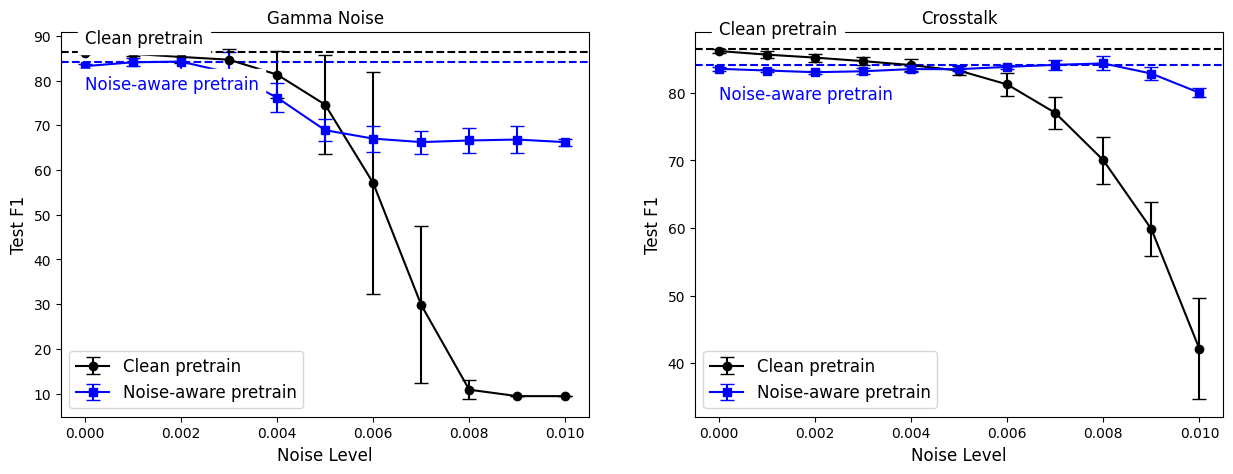

In [3]:
# Set font size
font_size = 12

# Create subfigures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot gamma_noise in subfigure 1
ax1.errorbar(Gamma_noise.x_axis, Gamma_noise.y_weight_mean, yerr=Gamma_noise.y_weight_std, fmt='k-o', label='Clean pretrain', capsize=5)
ax1.errorbar(Gamma_noise.x_axis, Gamma_noise.y_phase_mean, yerr=Gamma_noise.y_phase_std, fmt='b-s', label='Noise-aware pretrain', capsize=5)
ax1.axhline(y=Gamma_noise.weight_pretrain, color='k', linestyle='--')
ax1.axhline(y=Gamma_noise.phase_pretrain, color='b', linestyle='--')
ax1.text(0, Gamma_noise.weight_pretrain+3, 'Clean pretrain', color='k', va='center', ha='left', backgroundcolor='w', fontsize=font_size)
ax1.text(0, Gamma_noise.phase_pretrain-3, 'Noise-aware pretrain', color='b', va='top', ha='left', backgroundcolor='w', fontsize=font_size)
ax1.set_title('Gamma Noise', fontsize=font_size)
ax1.set_xlabel('Noise Level', fontsize=font_size)
ax1.set_ylabel('Test F1', fontsize=font_size)
ax1.legend(fontsize=font_size)

# Plot Crosstalk in subfigure 2
ax2.errorbar(Crosstalk.x_axis, Crosstalk.y_weight_mean, yerr=Crosstalk.y_weight_std, fmt='k-o', label='Clean pretrain', capsize=5)
ax2.errorbar(Crosstalk.x_axis, Crosstalk.y_phase_mean, yerr=Crosstalk.y_phase_std, fmt='b-s', label='Noise-aware pretrain', capsize=5)
ax2.axhline(y=Crosstalk.weight_pretrain, color='k', linestyle='--')
ax2.axhline(y=Crosstalk.phase_pretrain, color='b', linestyle='--')
ax2.text(0, Gamma_noise.weight_pretrain+3, 'Clean pretrain', color='k', va='center', ha='left', backgroundcolor='w', fontsize=font_size)
ax2.text(0, Gamma_noise.phase_pretrain-3, 'Noise-aware pretrain', color='b', va='top', ha='left', backgroundcolor='w', fontsize=font_size)
ax2.set_title('Crosstalk', fontsize=font_size)
ax2.set_xlabel('Noise Level', fontsize=font_size)
ax2.set_ylabel('Test F1', fontsize=font_size)
ax2.legend(fontsize=font_size)

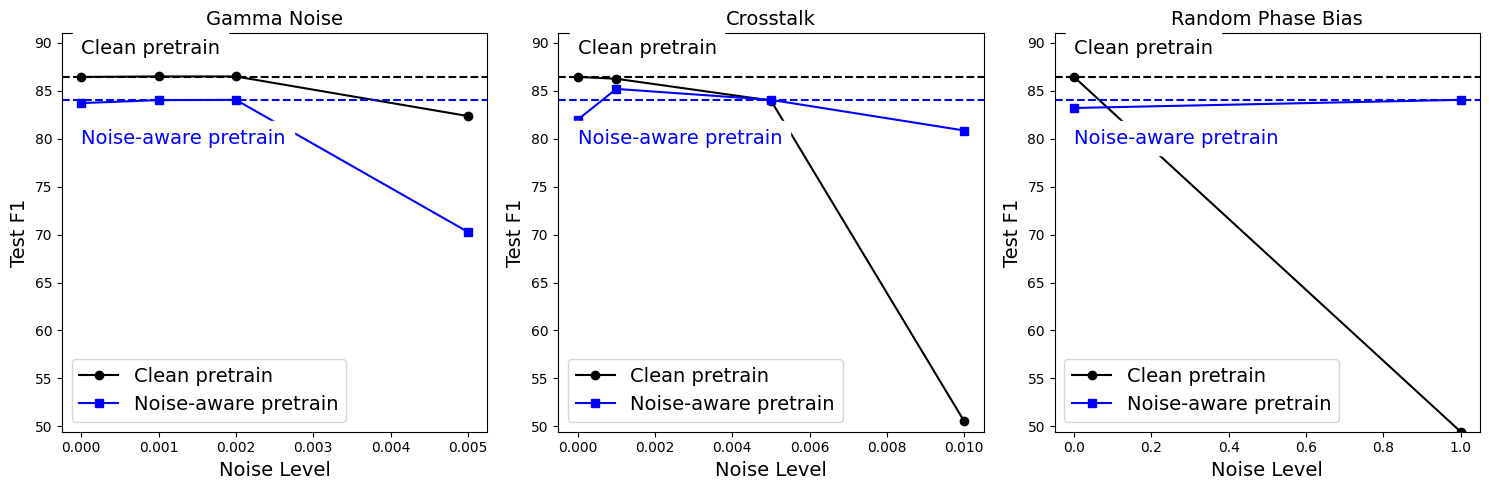

In [ ]:
import matplotlib.pyplot as plt

# Define the NoiseResult class and create instances
class NoiseResult:
    def __init__(self, name, x_axis, y_weight, y_phase):
        self.name = name
        self.weight_pretrain = 86.45
        self.phase_pretrain = 84.06
        self.x_axis = x_axis
        self.y_weight = y_weight
        self.y_phase = y_phase

Gamma_noise = NoiseResult('Gamma noise', 
                          [0, 0.001, 0.002, 0.005], 
                          [86.45, 86.50, 86.50, 82.37], 
                          [83.72, 84.03, 84.06, 70.28])

Crosstalk = NoiseResult('Crosstalk', 
                          [0, 0.001, 0.005, 0.01], 
                          [86.45, 86.26, 83.99, 50.51], 
                          [81.98, 85.20, 84.06, 80.86])

Random_phase_bias = NoiseResult('Random phase bias', 
                          [0, 1], 
                          [86.45, 49.43], 
                          [83.21, 84.06])

# Set font size
font_size = 14

# Create subfigures
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot gamma_noise in subfigure 1
ax1.plot(Gamma_noise.x_axis, Gamma_noise.y_weight, 'k-o', label='Clean pretrain')
ax1.plot(Gamma_noise.x_axis, Gamma_noise.y_phase, 'b-s', label='Noise-aware pretrain')
ax1.axhline(y=Gamma_noise.weight_pretrain, color='k', linestyle='--')
ax1.axhline(y=Gamma_noise.phase_pretrain, color='b', linestyle='--')
ax1.text(0, Gamma_noise.weight_pretrain+3, 'Clean pretrain', color='k', va='center', ha='left', backgroundcolor='w', fontsize=font_size)
ax1.text(0, Gamma_noise.phase_pretrain-3, 'Noise-aware pretrain', color='b', va='top', ha='left', backgroundcolor='w', fontsize=font_size)
ax1.set_title('Gamma Noise', fontsize=font_size)
ax1.set_xlabel('Noise Level', fontsize=font_size)
ax1.set_ylabel('Test F1', fontsize=font_size)
ax1.legend(fontsize=font_size)

# Plot Crosstalk in subfigure 2
ax2.plot(Crosstalk.x_axis, Crosstalk.y_weight, 'k-o', label='Clean pretrain')
ax2.plot(Crosstalk.x_axis, Crosstalk.y_phase, 'b-s', label='Noise-aware pretrain')
ax2.axhline(y=Crosstalk.weight_pretrain, color='k', linestyle='--')
ax2.axhline(y=Crosstalk.phase_pretrain, color='b', linestyle='--')
ax2.text(0, Gamma_noise.weight_pretrain+3, 'Clean pretrain', color='k', va='center', ha='left', backgroundcolor='w', fontsize=font_size)
ax2.text(0, Gamma_noise.phase_pretrain-3, 'Noise-aware pretrain', color='b', va='top', ha='left', backgroundcolor='w', fontsize=font_size)
ax2.set_title('Crosstalk', fontsize=font_size)
ax2.set_xlabel('Noise Level', fontsize=font_size)
ax2.set_ylabel('Test F1', fontsize=font_size)
ax2.legend(fontsize=font_size)

# Plot Random_phase_bias in subfigure 3
ax3.plot(Random_phase_bias.x_axis, Random_phase_bias.y_weight, 'k-o', label='Clean pretrain')
ax3.plot(Random_phase_bias.x_axis, Random_phase_bias.y_phase, 'b-s', label='Noise-aware pretrain')
ax3.axhline(y=Random_phase_bias.weight_pretrain, color='k', linestyle='--')
ax3.axhline(y=Random_phase_bias.phase_pretrain, color='b', linestyle='--')
ax3.text(0, Gamma_noise.weight_pretrain+3, 'Clean pretrain', color='k', va='center', ha='left', backgroundcolor='w', fontsize=font_size)
ax3.text(0, Gamma_noise.phase_pretrain-3, 'Noise-aware pretrain', color='b', va='top', ha='left', backgroundcolor='w', fontsize=font_size)
ax3.set_title('Random Phase Bias', fontsize=font_size)
ax3.set_xlabel('Noise Level', fontsize=font_size)
ax3.set_ylabel('Test F1', fontsize=font_size)
ax3.legend(fontsize=font_size)

# Set the same y-axis limits for all subfigures
y_min = min(min(Gamma_noise.y_weight), min(Gamma_noise.y_phase), min(Crosstalk.y_weight), min(Crosstalk.y_phase), min(Random_phase_bias.y_weight), min(Random_phase_bias.y_phase))
y_max = 91
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)
ax3.set_ylim(y_min, y_max)

# Show plot
plt.tight_layout()
plt.show()